<a href="https://colab.research.google.com/github/Devikrishna545/Self-Attention-Implementation-ML-/blob/main/Self_Attention_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3d projections


In [ ]:
labels=["Dream","big","and","work","for","it"]

inputs = torch.tensor([
    [0.75, 0.42, 0.31],  # dream
    [0.90, 0.50, 0.40],  # big
    [0.20, 0.10, 0.05],  # and
    [0.92, 0.53, 0.41],  # work
    [0.35, 0.20, 0.15],  # for
    [0.05, 0.90, 0.10],  # it (roughly orthogonal/away from others)
])

In [ ]:
magnitude_tokens = torch.linalg.norm(inputs,dim=1)
print("Magnitude of tokens:")
for i,m in enumerate(magnitude_tokens.tolist()):
  print(f"{labels[i]}:{m:.4f}")

Magnitude of tokens:
Dream:0.9138
big:1.1045
and:0.2291
work:1.1382
for:0.4301
it:0.9069


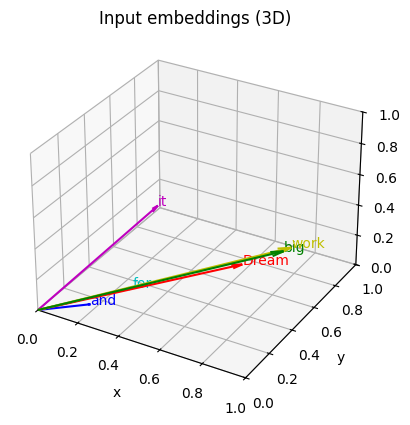

In [ ]:
#visualize the 3d vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# extract x,y,z cordinate
x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()

colors = ["r","g","b","y","c","m"]
for(x,y,z,lab,color)in zip(x_coords,y_coords,z_coords,labels,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,lab,color=color,fontsize=10)

ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z')
ax.set_xlim([0,1]);
ax.set_ylim([0,1]);
ax.set_zlim([0,1])
plt.title("Input embeddings (3D)")
plt.show()

In [ ]:
#Attention score calculation

In [ ]:
#for example first we can calculate key 2 or the second elements attention with itself and all other words.
#attention score is calculated by the dot product of vectors to get a scalar value. elemental wise dot product
#ie ,input vector is multiplied to the transpose of input vector(a Xa^T ).
#Treat each token as both query and key (simplified self-attention without Wq, Wk, Wv)

In [ ]:
#attention_score-->omega

omega = inputs @ inputs.T
print(omega)

#for key 2->word "big" the attention score is
print("attention score of big:",omega[1])

tensor([[0.8350, 1.0090, 0.2075, 1.0397, 0.3930, 0.4465],
        [1.0090, 1.2200, 0.2500, 1.2570, 0.4750, 0.5350],
        [0.2075, 0.2500, 0.0525, 0.2575, 0.0975, 0.1050],
        [1.0397, 1.2570, 0.2575, 1.2954, 0.4895, 0.5640],
        [0.3930, 0.4750, 0.0975, 0.4895, 0.1850, 0.2125],
        [0.4465, 0.5350, 0.1050, 0.5640, 0.2125, 0.8225]])
attention score of big: tensor([1.0090, 1.2200, 0.2500, 1.2570, 0.4750, 0.5350])


In [ ]:
# normalizing attention score using softmax,to make the sums equal to 1 ie ,they are the weights of attention.
# attention weights.

In [ ]:
alphas = torch.softmax(omega,dim=1)
print("attention weights :",alphas)

attention weights : tensor([[0.1897, 0.2257, 0.1013, 0.2328, 0.1219, 0.1286],
        [0.1926, 0.2378, 0.0901, 0.2468, 0.1129, 0.1199],
        [0.1739, 0.1815, 0.1490, 0.1828, 0.1558, 0.1570],
        [0.1927, 0.2395, 0.0881, 0.2488, 0.1111, 0.1197],
        [0.1793, 0.1946, 0.1334, 0.1974, 0.1456, 0.1497],
        [0.1619, 0.1769, 0.1151, 0.1821, 0.1281, 0.2358]])


In [ ]:
#check the sum of each rows to be 1
row_sum = alphas.sum(dim=-1)
print(row_sum)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [ ]:
#To get output Context vectors  ,attention weights X input embeddings

output_context_vector =alphas @ inputs
print(output_context_vector)

context_vector_key2 = output_context_vector[1]

tensor([[0.6289, 0.4662, 0.2807],
        [0.6490, 0.4700, 0.2894],
        [0.5542, 0.4480, 0.2480],
        [0.6515, 0.4713, 0.2906],
        [0.5764, 0.4544, 0.2578],
        [0.5279, 0.5024, 0.2442]])


In [ ]:
#if i want to show Context vector of key 2 vector with the other keys and key 2 vector
print(context_vector_key2)

tensor([0.6490, 0.4700, 0.2894])


In [ ]:
#appending to inputs the context _vector of key 2

